Horse Race Prediction:

Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df_train= pd.read_csv(r'C:\Users\ayish\GuviProjects\Horse race Prediction\df_train.csv')
df_test= pd.read_csv(r'C:\Users\ayish\GuviProjects\Horse race Prediction\df_test.csv')

In [23]:
df_train

,finishing_position,horse_number,horse_name,horse_id,jockey,trainer,actual_weight,declared_horse_weight,draw,length_behind_winner,...,running_position_6,race_id,recent_6_runs,recent_ave_rank,race_distance,HorseWin,HorseRankTop3,HorseRankTop50Percent,jockey_ave_rank,trainer_ave_rank
0,1,1.0,DOUBLE DRAGON,K019,B Prebble,D Cruz,133,1032,1,-,...,NaN,2014-001,1,13.0,1400,1,1,1,6.058185,7.369681
1,2,2.0,PLAIN BLUE BANNER,S070,D Whyte,D E Ferraris,133,1075,13,2,...,NaN,2014-001,2,13.0,1400,0,1,1,5.795734,6.721234
2,3,10.0,GOLDWEAVER,P072,Y T Cheng,Y S Tsui,121,1065,3,2,...,NaN,2014-001,3,13.0,1400,0,1,1,7.857759,6.850174
3,4,3.0,SUPREME PROFIT,P230,J Moreira,C S Shum,132,1222,2,2,...,NaN,2014-001,4,13.0,1400,0,0,1,4.173402,6.631579
4,5,7.0,THE ONLY KID,H173,Z Purton,K W Lui,125,1136,9,4-1/4,...,NaN,2014-001,5,13.0,1400,0,0,1,5.343498,6.846633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5281,8,7.0,GOLDEN CANNON,T022,K K Chiong,K W Lui,119,951,8,2,...,NaN,2016-563,8/3/8/3/8/9,13.0,1000,0,0,0,7.328638,7.307292
5282,9,12.0,NOBLE BUDDIES,T356,K Teetan,A Lee,113,1185,1,2-1/2,...,NaN,2016-563,9/3/10/8/10/7,13.0,1000,0,0,0,6.523077,7.435345
5283,10,11.0,LUCKY FRIENDS,V155,K C Ng,D E Ferraris,108,1094,6,3,...,NaN,2016-563,10/10/8/9/6/14,13.0,1000,0,0,0,9.533333,6.197425
5284,11,1.0,INVISIBLE,T418,C Y Ho,C Fownes,131,1140,10,4,...,NaN,2016-563,11/4/8/8/6/6,13.0,1000,0,0,0,7.962500,6.990000


In [3]:
df=pd.concat([df_train,df_test], axis=0)

df_train=df.copy()

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26425 entries, 0 to 5285
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   finishing_position     26425 non-null  int64  
 1   horse_number           26425 non-null  float64
 2   horse_name             26425 non-null  object 
 3   horse_id               26425 non-null  object 
 4   jockey                 26425 non-null  object 
 5   trainer                26425 non-null  object 
 6   actual_weight          26425 non-null  int64  
 7   declared_horse_weight  26425 non-null  int64  
 8   draw                   26425 non-null  int64  
 9   length_behind_winner   26425 non-null  object 
 10  running_position_1     26425 non-null  float64
 11  running_position_2     26425 non-null  float64
 12  running_position_3     26425 non-null  float64
 13  running_position_4     14907 non-null  float64
 14  finish_time            26425 non-null  object 
 15  win_odds

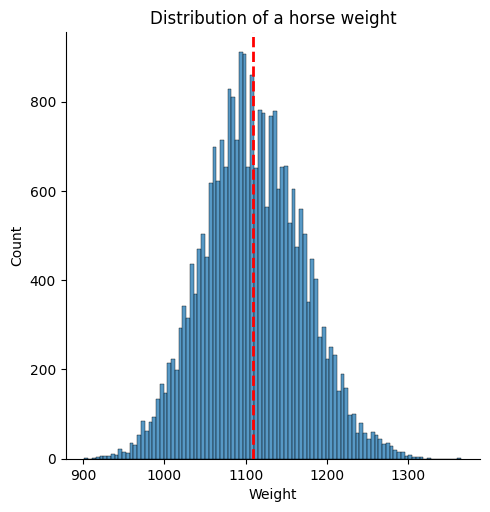

In [5]:

sns.displot(df_train['declared_horse_weight'], bins=100, kde=False)
plt.title("Distribution of a horse weight")
plt.xlabel("Weight")
plt.ylabel("Count")
plt.axvline(df_train['declared_horse_weight'].mean(), color='r', linestyle='dashed', linewidth=2)
plt.show()

In [6]:
numHorsePerRace = df_train.groupby('race_id')['horse_id'].count().value_counts()
Number_of_horses=numHorsePerRace.index
fig=px.bar(x=Number_of_horses, y=numHorsePerRace.values,labels={'x':'Number of Horses','y':'count'},
            title='Distribution of Number of Horses per Race')
fig.show()


In [14]:
fig=px.histogram(df_train['actual_weight'], labels={'value':'Actual weight'},marginal='box',
                 title='Distribution of actual weight')

fig.show()

In [25]:
plt.figure(figsize=(10, 5))
fig=px.bar(x=df_train['finishing_position'].unique(), y=df_train.groupby('finishing_position')['win_odds'].mean(),
           title='Mean Win Odds against Finishing Position',labels={'x':'Finishing Position','y':'Mean of Win Odds'})

fig.show()

<Figure size 1000x500 with 0 Axes>

In [27]:
fig=px.scatter(df_train, x='actual_weight',y='win_odds',title='Distribution of Actual Weight against Win Odds')
fig.show()

In [28]:
fig=px.scatter(df_train,x='actual_weight', y='horse_number',title='Distribution of Actual Weight against Horse Number' )
fig.show()

(1070.0, 1120.0)

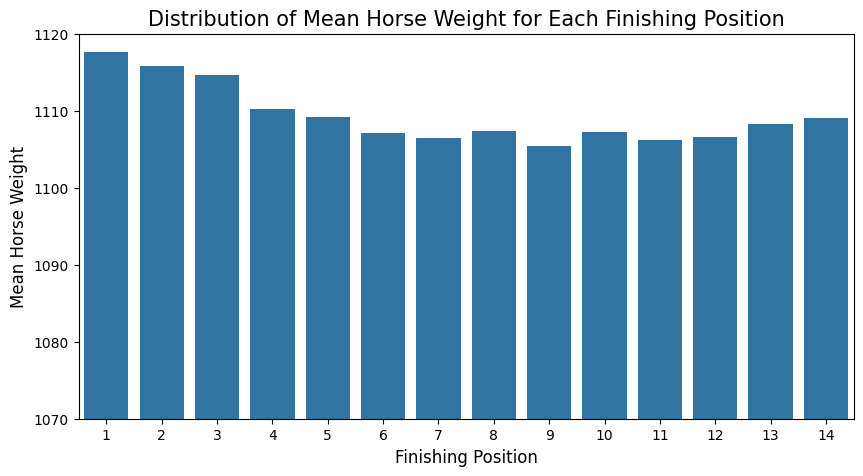

In [30]:
# Find the mean of horse weight for each position
meanHorseWtPerPos = df_train.groupby('finishing_position')['declared_horse_weight'].mean()

plt.figure(figsize=(10, 5))
sns.barplot(x=meanHorseWtPerPos.index, y=meanHorseWtPerPos.values)
plt.xlabel('Finishing Position', fontsize=12)
plt.ylabel('Mean Horse Weight', fontsize=12)
plt.title('Distribution of Mean Horse Weight for Each Finishing Position', fontsize=15)

# Set y limit
plt.ylim(1070, 1120)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'finishing_position'),
  Text(1.5, 0, 'actual_weight'),
  Text(2.5, 0, 'declared_horse_weight'),
  Text(3.5, 0, 'draw'),
  Text(4.5, 0, 'jockey_ave_rank'),
  Text(5.5, 0, 'trainer_ave_rank'),
  Text(6.5, 0, 'race_distance')])

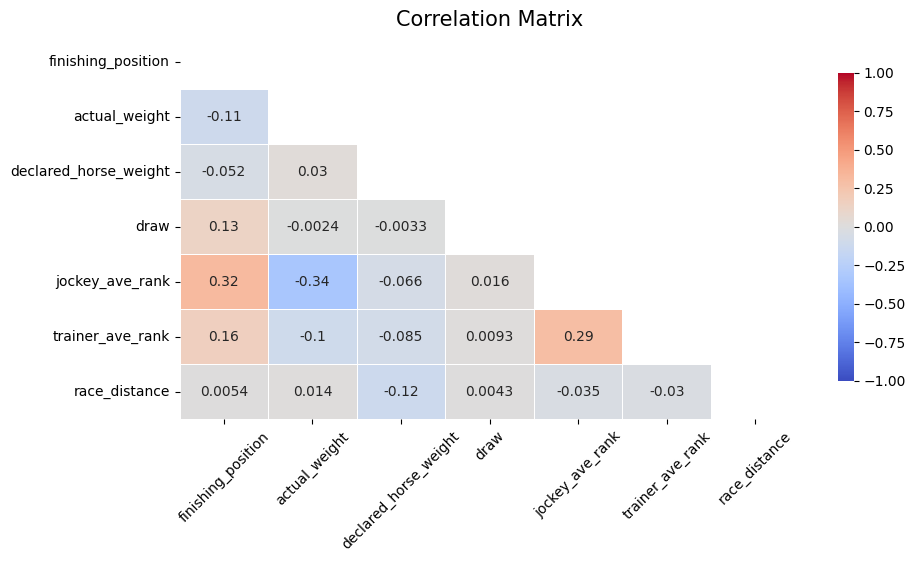

In [37]:
cols = ['finishing_position', 'actual_weight', 'declared_horse_weight', 'draw', 
        'jockey_ave_rank','trainer_ave_rank', 'race_distance']

# view the correlation matrix
corr = df_train[cols].corr()

# do a mask to hide the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# plot the heatmap with the mask and correct aspect ratio
plt.figure(figsize=(10, 5))
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, vmin=-1, 
            center=0, square=False, linewidths=.5, 
            cbar_kws={"shrink": .8}, annot=True)
plt.title('Correlation Matrix', fontsize=15)

# rotate the ticklabels for easier reading
plt.xticks(rotation=45)

To Find the best jockey:

In [38]:
print("There are {} jockeys in the dataset.".format(len(df_train['jockey'].unique())))

There are 103 jockeys in the dataset.


In [39]:
jockeyWins = df_train.groupby('jockey')['finishing_position'].apply(lambda x: (x==1).sum())

# Finding the win rate per jockey
jockeyWinRate = df_train.groupby('jockey')['HorseWin'].mean()

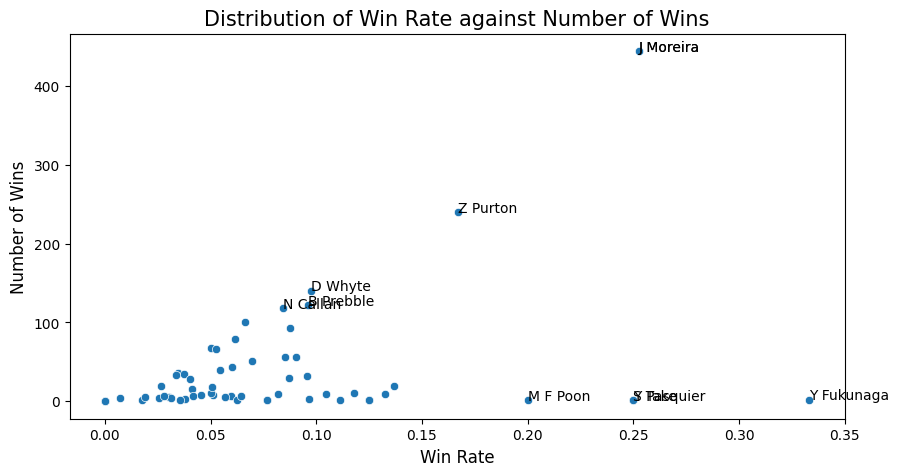

In [41]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=jockeyWinRate, y=jockeyWins)
plt.xlabel('Win Rate', fontsize=12)
plt.ylabel('Number of Wins', fontsize=12)
plt.title('Distribution of Win Rate against Number of Wins', fontsize=15)

# Annotate the top 5 jockeys with the most wins
for i in jockeyWins.sort_values(ascending=False)[:5].index:
    plt.annotate(i, (jockeyWinRate[i], jockeyWins[i]))

# Annotation for the top 5 jockeys with the highest win rate
for i in jockeyWinRate.sort_values(ascending=False)[:5].index:
    plt.annotate(i, (jockeyWinRate[i], jockeyWins[i]))